## Scikit-learn Titanic Example p129

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### train data info ### \n')
print(titanic_df.info())


 ### train data info ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('Data set Null value number: ', titanic_df.isnull().sum().sum())

Data set Null value number:  0


In [4]:
print(' Sex variance:\n', titanic_df['Sex'].value_counts())
print('\n Cabin variance: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked variance: \n', titanic_df['Embarked'].value_counts())

 Sex variance:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin variance: 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
A14              1
C45              1
D47              1
A19              1
D28              1
Name: Cabin, Length: 148, dtype: int64

 Embarked variance: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

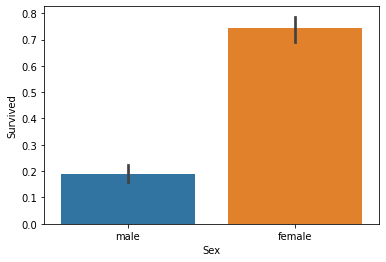

In [7]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

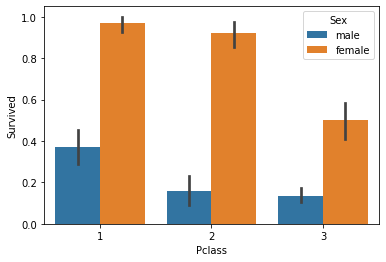

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

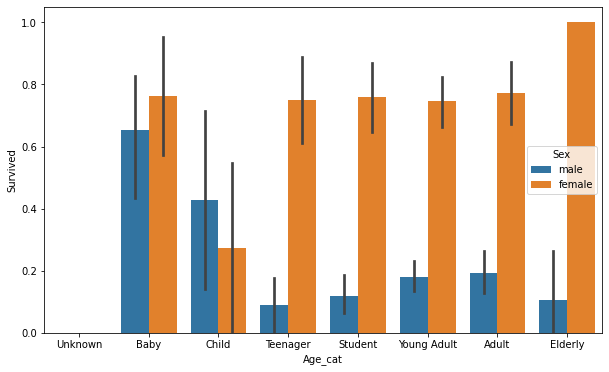

In [9]:
  # 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
  def get_category(age):
      cat = ''
      if age<= -1: cat = 'Unkown'
      elif age <= 5: cat = 'Baby'
      elif age <=12: cat = 'Child'
      elif age <=18: cat = 'Teenager'
      elif age <=25: cat = 'Student'
      elif age <=35: cat = 'Young Adult'
      elif age <= 60: cat = 'Adult'
      else: cat = 'Elderly'
      
      return cat
  
  # barplot size change
  plt.figure(figsize=(10, 6))
  
  # X axis naming change
  group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
  
  # Lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
  # get_category(x)는 입력값으로 'Age' colums값을 받아서 해당하는 cat 반환
  titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
  sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
  titanic_df.drop('Age_cat', axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [13]:
 # Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# Machine learning algorithm에 불필요한 feature 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# Label encoding 
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
     

In [14]:
# reload the original data, extract the feature data set and lable data set
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# DecisionTree, Random Forest, logistic Regression을 위한 sckikit-learn classifier class generation 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier accuracy: 0.7877
RandomForestClassifier accuracy:0.8547
LogisticRegression accuracy:0.8659


## Cross Validation

In [21]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # fold set를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores=[]
    
    # KFold cross validation 
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("Cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("Average accuracy: {0:.4f}".format(mean_score))
# exec_kfold call
exec_kfold(dt_clf, folds=5)
        

Cross validation 0 accuracy: 0.7542
Cross validation 1 accuracy: 0.7809
Cross validation 2 accuracy: 0.7865
Cross validation 3 accuracy: 0.7697
Cross validation 4 accuracy: 0.8202
Average accuracy: 0.7823


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("Cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
    
print("Average accuracy: {0:.4f}".format(np.mean(scores)))

Cross validation 0 accuracy: 0.7430
Cross validation 1 accuracy: 0.7753
Cross validation 2 accuracy: 0.7921
Cross validation 3 accuracy: 0.7865
Cross validation 4 accuracy: 0.8427
Average accuracy: 0.7879


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV optimal hyper parameter:', grid_dclf.best_params_)
print('GridSearchCV max accuracy: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('Test set DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy))

GridSearchCV optimal hyper parameter: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV max accuracy: 0.7992
Test set DecisionTreeClassifier accuracy: 0.8715


## Summary
Machine learning application은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업

학습 데이터를 기반으로 Machine learning algorithm을 적용해 모델을 학습

학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행

예측된 결과값을 실제 결과값과 비교해 머신러닝 모델에 대한 평가를 수행

## Data preprocess

오류 데이터의 보정이나 Null 처리 등의 다양한 데이터 클렌징 작업, 레이블 인코딩이나 one-hot encoding, 데이터의 scaling/normalization 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것

머신러닝 모델은 학습 데이터 세트로 학습한 뒤에는 반드시 별도의 테스트 데이터 세트로 평가되어야 한다. 

학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증을 수행할 수 있다. 

scikit-learn: KFold, StratifiedKFold, cross_val_score() 

최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공 
